In [34]:
import os
HOME= os.getcwd()
print(HOME)

/content/datasets


In [35]:
%%capture
!pip install -q ultralytics roboflow

In [37]:
from roboflow import Roboflow
from google.colab import userdata
from IPython.display import Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(10)
dataset = version.download("yolov8")

In [30]:
dataset_location = "/content/datasets/football-players-detection-10"
yaml_path = f"{dataset_location}/data.yaml"

with open(yaml_path, "r") as file:
    data = file.readlines()

data = [line if not line.startswith("train:") else "train: ../train/images\n" for line in data]
data = [line if not line.startswith("val:") else "val: ../valid/images\n" for line in data]

with open(yaml_path, "w") as file:
    file.writelines(data)

print("Updated data.yaml successfully!")

Updated data.yaml successfully!


In [7]:
import torch
torch.cuda.empty_cache()

In [8]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml batch=2 epochs=50 imgsz=1280 plots=True

/content
100% 131M/131M [00:00<00:00, 216MB/s]
Ultralytics 8.3.76 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/datasets/football-players-detection-10/data.yaml, epochs=50, time=None, patience=100, batch=2, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, 

In [9]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1739948736.c7c1331ae994.2048.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch5000.jpg  weights
P_curve.png					    train_batch5001.jpg
PR_curve.png					    train_batch5002.jpg


/content


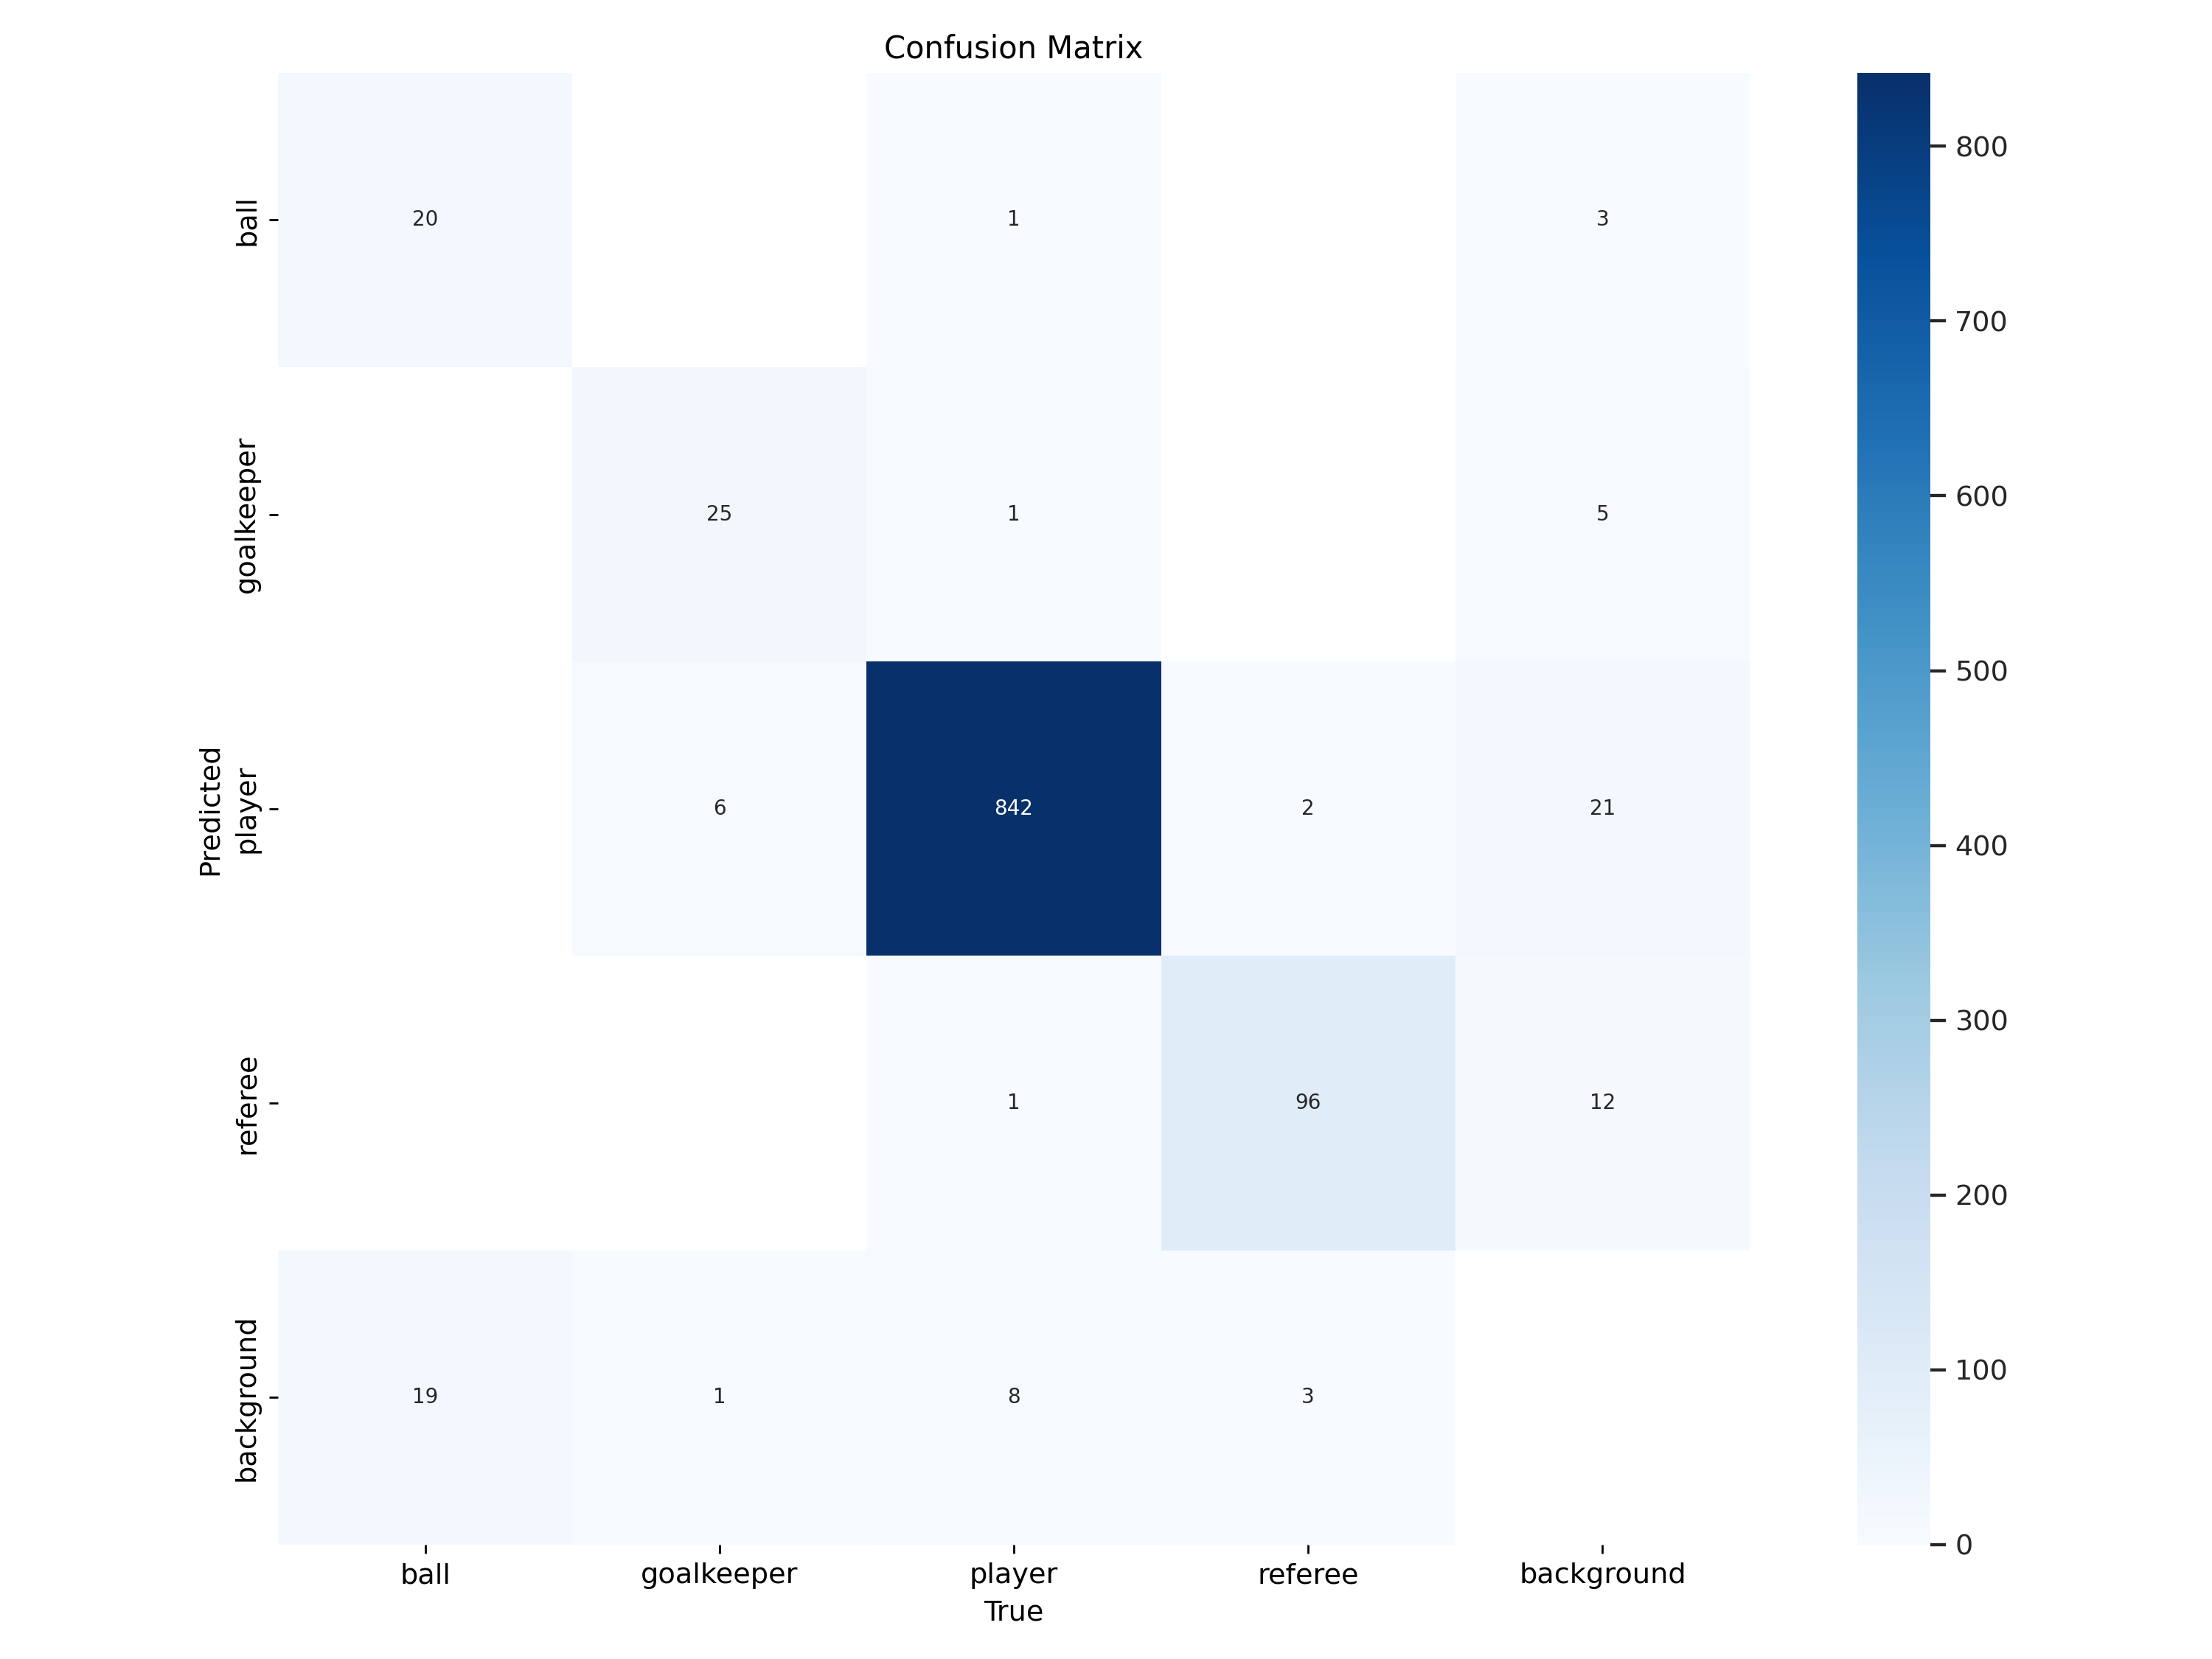

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


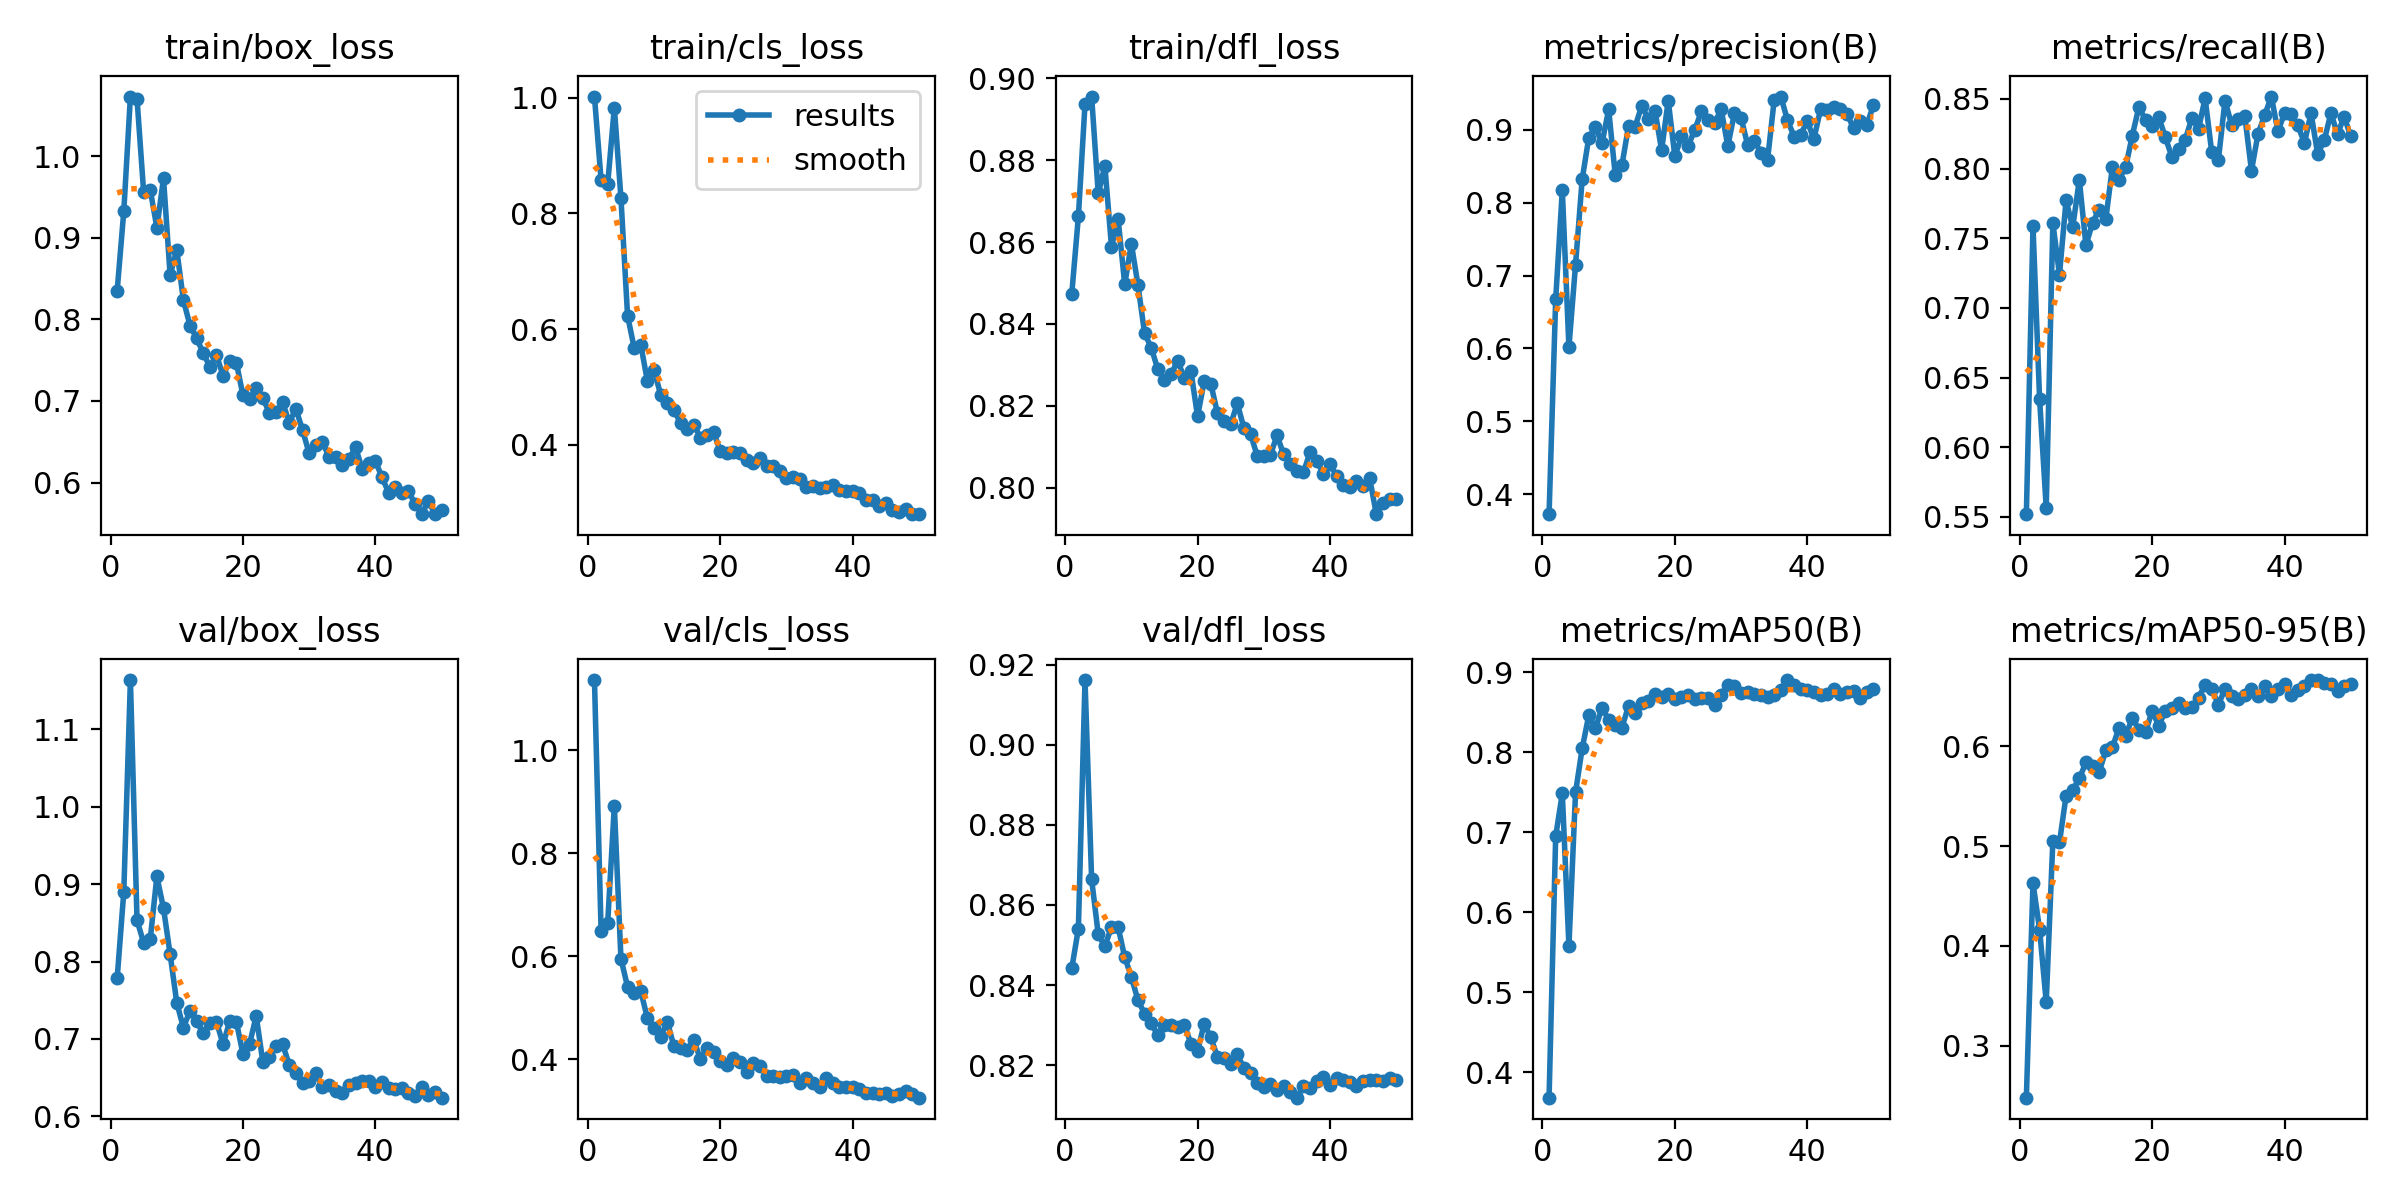

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


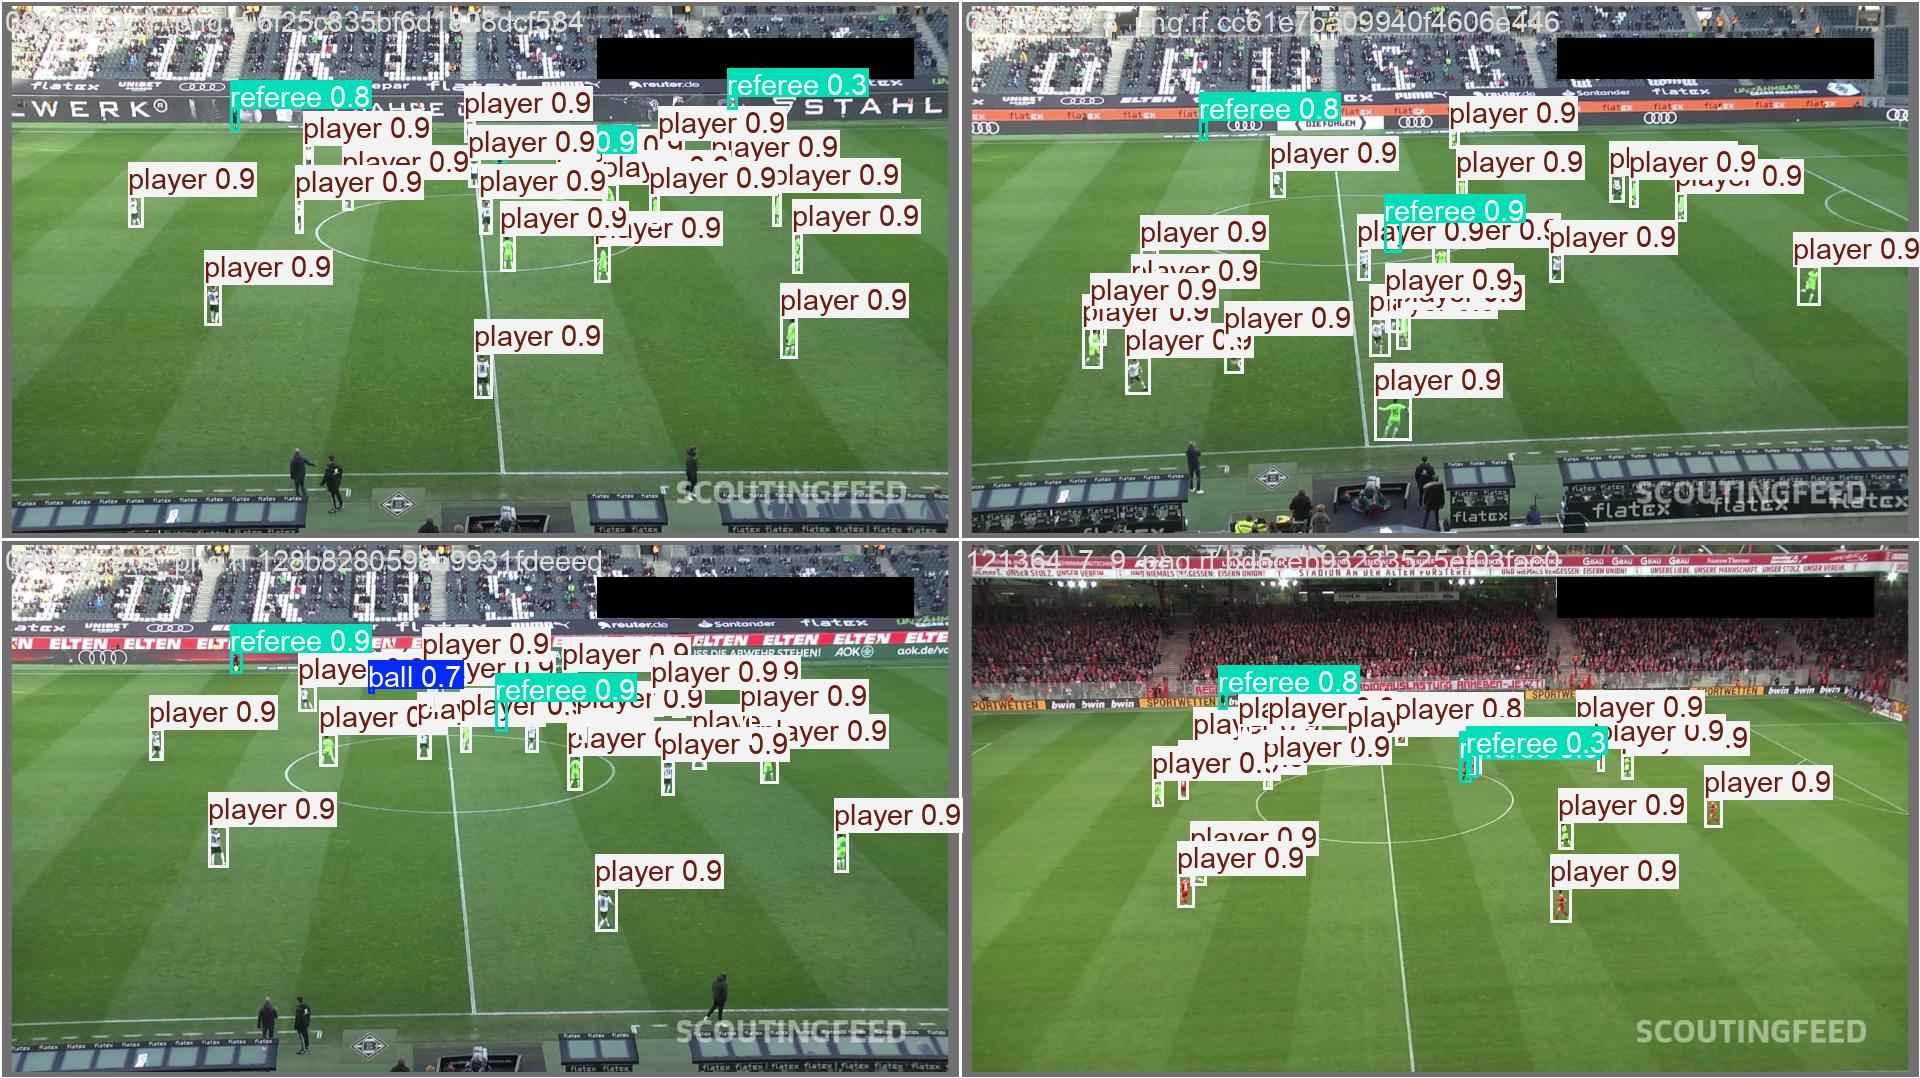

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [13]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml imgsz=1280

/content
Ultralytics 8.3.76 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,127,420 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /content/datasets/football-players-detection-10/valid/labels.cache... 43 images, 0 backgrounds, 0 corrupt: 100% 43/43 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:07<00:00,  2.39s/it]
                   all         43       1025      0.932       0.84      0.879      0.677
                  ball         39         39      0.868      0.505       0.59      0.343
            goalkeeper         32         32      0.944      0.906      0.949      0.767
                player         43        853      0.972      0.987      0.992      0.863
               referee         43        101      0.943       0.96      0.984      0.735
Speed: 0.7ms preprocess, 140.8ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to runs/d

In [29]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics==8.0.196 is required but found version=8.3.76, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
An error occured when getting the model upload URL: 404 Client Error: Not Found for url: https://api.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/10/uploadModel?api_key=RdJ2NtyX9m5xAyE0VGdO&modelType=yolov8&nocache=true


In [ ]:
yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source=video.mp4